In [1]:
# 1. Mount Google Drive untuk mengakses file CSV
from google.colab import drive

# Melakukan mounting Google Drive agar dapat membaca file CSV yang tersimpan
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 2. Import pustaka yang diperlukan
import pandas as pd  # Untuk memproses data dalam format DataFrame
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi data latih dan uji
from sklearn.svm import SVR  # Untuk membangun model Support Vector Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, auc  # Metode evaluasi model
from sklearn.preprocessing import StandardScaler  # Untuk melakukan normalisasi data

In [10]:
file_path = '/content/drive/MyDrive/Pembelajaran Mesin/CreditDataset.csv'  # Ganti dengan path file Anda
df = pd.read_csv(file_path)  # Membaca file CSV menggunakan panda

In [11]:
# 3. Preprocessing data
# One-hot encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

In [12]:
# Membagi dataset menjadi fitur (X) dan target (y)
X = df_encoded.drop(columns=['Class'])  # Semua kolom kecuali 'Class'
y = df_encoded['Class']  # Kolom target

In [13]:
# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Membagi dataset menjadi data latih dan uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# 4. Melatih model Support Vector Regression
svr_model = SVR(kernel='linear')  # Inisialisasi model SVR dengan kernel linear
svr_model.fit(X_train, y_train)  # Melatih model dengan data latih


SVR(kernel='linear')

In [16]:
# 5. Melakukan prediksi pada data uji
y_pred = svr_model.predict(X_test)

In [17]:
# 6. Evaluasi model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R2 Score


In [18]:
# Menampilkan hasil evaluasi
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error (MSE): 0.1907236978374839
Mean Absolute Error (MAE): 0.3112341702817577
R2 Score: 0.08294892252682329


Kode tersebut menampilkan hasil evaluasi model regresi, yang ditunjukkan oleh tiga metrik: Mean Squared Error (MSE), Mean Absolute Error (MAE), dan R-squared (R2). Nilai MSE sebesar 0.1907 menunjukkan rata-rata kuadrat selisih antara prediksi model dan nilai aktual. Nilai MAE sebesar 0.3112 menunjukkan rata-rata selisih absolut antara prediksi dan nilai aktual. Terakhir, nilai R2 sebesar 0.0829 mengindikasikan bahwa model hanya menjelaskan sekitar 8.29% varians dalam data. Nilai R2 yang rendah menunjukkan bahwa model regresi yang digunakan tidak mampu memprediksi dengan baik variabel dependen berdasarkan variabel independen yang digunakan. Secara keseluruhan, metrik-metrik tersebut menunjukkan performa model yang kurang baik.

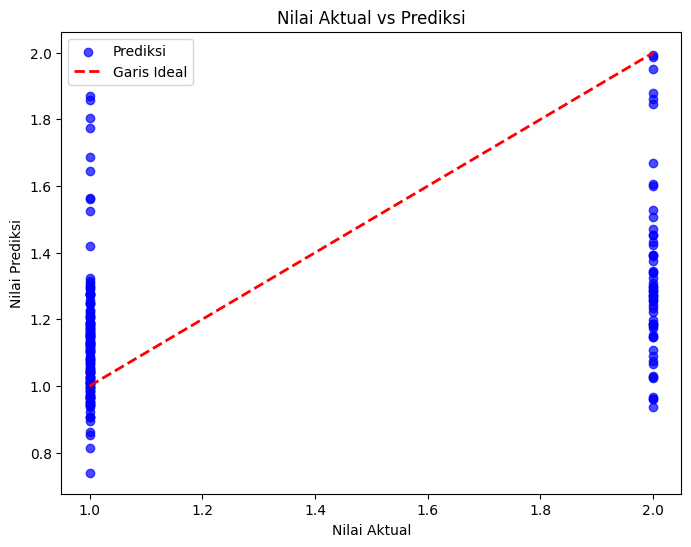

In [19]:
# 7. Visualisasi hasil prediksi
# Plot nilai aktual vs prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Prediksi')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Garis Ideal')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Aktual vs Prediksi')
plt.legend()
plt.show()

Kode tersebut menghasilkan scatter plot yang memvisualisasikan perbandingan antara nilai aktual dan nilai prediksi dari suatu model. Sumbu-x menunjukkan nilai aktual (y_test), dan sumbu-y menunjukkan nilai prediksi (y_pred). Titik-titik biru merepresentasikan pasangan nilai aktual dan prediksi. Garis merah putus-putus merupakan garis ideal (y=x), di mana titik-titik berada pada garis ini jika prediksi sempurna.

Dari plot tersebut terlihat bahwa titik-titik biru tersebar cukup jauh dari garis ideal, terutama terkonsentrasi di sekitar nilai aktual sekitar 1. Ini menunjukkan bahwa model prediksi memiliki akurasi yang rendah. Sebagian besar prediksi kurang tepat, yang mengindikasikan bahwa model perlu ditingkatkan atau dimodifikasi untuk mendapatkan hasil yang lebih akurat. Secara visual, plot ini menguatkan temuan metrik evaluasi sebelumnya yang menunjukkan performa model yang kurang baik.

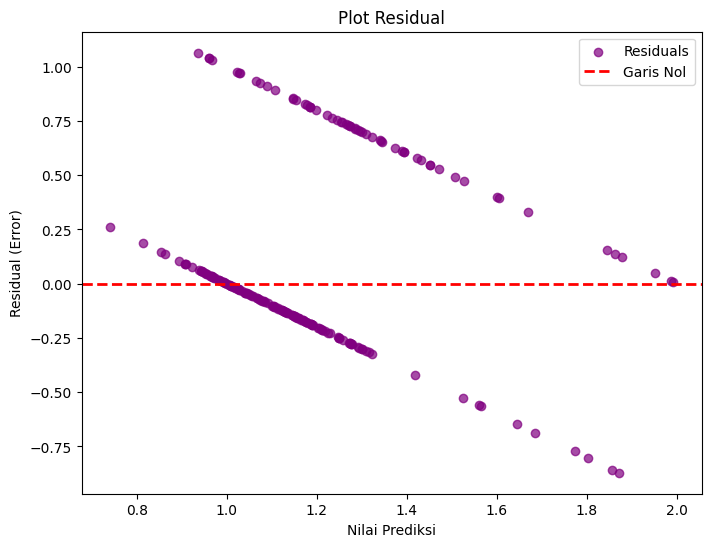

In [20]:
# Plot residual (error)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple', label='Residuals')
plt.axhline(0, color='red', linestyle='--', lw=2, label='Garis Nol')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residual (Error)')
plt.title('Plot Residual')
plt.legend()
plt.show()

 Plot residual ini menunjukkan bahwa model yang digunakan tidak sesuai dengan data dengan baik. Pola dan heteroskedastisitas dalam residual menunjukkan adanya permasalahan dalam model, yang mungkin disebabkan oleh adanya non-linearitas dalam data atau masalah lainnya. Model perlu diperbaiki atau diganti dengan model yang lebih tepat.

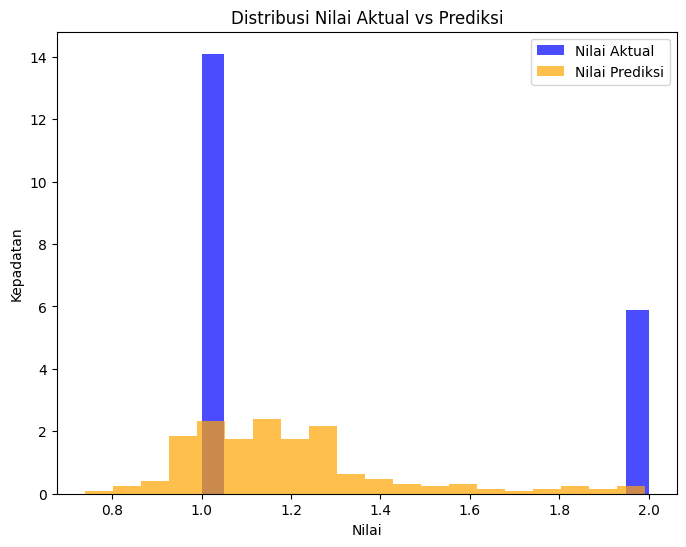

In [21]:
# Plot distribusi nilai aktual vs prediksi
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=20, alpha=0.7, label='Nilai Aktual', color='blue', density=True)
plt.hist(y_pred, bins=20, alpha=0.7, label='Nilai Prediksi', color='orange', density=True)
plt.xlabel('Nilai')
plt.ylabel('Kepadatan')
plt.title('Distribusi Nilai Aktual vs Prediksi')
plt.legend()
plt.show()

Output tersebut menunjukkan histogram yang membandingkan distribusi nilai aktual dan nilai prediksi dari model. Histogram menampilkan frekuensi (atau kepadatan) nilai-nilai yang berada pada rentang tertentu. Batang biru mewakili distribusi nilai aktual, dan batang oranye mewakili distribusi nilai prediksi.

Dari histogram terlihat bahwa distribusi nilai aktual dan prediksi berbeda secara signifikan. Distribusi nilai aktual terpusat di sekitar nilai 1.0, sementara distribusi nilai prediksi lebih tersebar dan kurang terpusat. Perbedaan distribusi yang cukup mencolok ini menunjukkan bahwa model gagal untuk mereplikasi distribusi nilai aktual dengan baik. Ini lebih lanjut mengkonfirmasi bahwa model prediksi memiliki akurasi yang rendah dan tidak mampu menangkap distribusi sebenarnya dari variabel target. Model yang baik akan memiliki distribusi nilai prediksi yang sangat mirip dengan distribusi nilai aktual.